<a href="https://colab.research.google.com/github/lauratobon/Ai_Porject_2023/blob/main/02%20-%20modelos_e_iteraciones_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hotel Booking

**Hotel Booking Demand (Kaggle)** <br>
https://www.kaggle.com/jessemostipak/hotel-booking-demand


## Descripción de Variables

---

32 variables:

1.	**hotel** <br>
Hotel (H1 = Hotel Resort o H2 = Hotel Urbano)

2.	**is_canceled** <br>
Valor que indica si una reserva fue cancelada (1) o no (0)

3.	**lead_time** <br>
Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

4.	**arrival_date_year** <br>
Year of arrival date

5.	**arrival_date_month** <br>
Month of arrival date

6.	**arrival_date_week_number** <br>
Week number of year for arrival date

7.	**arrival_date_day_of_month** <br>
Day of arrival date

8.	**stays_in_weekend_nights** <br>
Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

9.	**stays_in_week_nights** <br>
Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

10.	**adults** <br>
Number of adults

11.	**children** <br>
Number of children

12.	**babies** <br>
Number of babies

13.	**meal** <br>
Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)

14.	**country** <br>
Country of origin. Categories are represented in the ISO 3155–3:2013 format

15.	**market_segment** <br>
Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

16.	**distribution_channel** <br>
Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

17.	**is_repeated_guest** <br>
Value indicating if the booking name was from a repeated guest (1) or not (0)

18.	**previous_cancellations** <br>
Number of previous bookings that were cancelled by the customer prior to the current booking

19.	**previous_bookings_not_canceled** <br>
Number of previous bookings not cancelled by the customer prior to the current booking

20.	**reserved_room_type** <br>
Code of room type reserved. Code is presented instead of designation for anonymity reasons.

21.	**assigned_room_type** <br>
Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.

22.	**booking_changes** <br>
Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

23.	**deposit_type** <br>
Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.

24.	**agent** <br>
ID of the travel agency that made the booking

25.	**company** <br>
ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons

26.	**days_in_waiting_list** <br>
Number of days the booking was in the waiting list before it was confirmed to the customer

27.	**customer_type** <br>
Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking

28.	**adr** <br>
Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

29.	**required_car_parking_spaces** <br>
Number of car parking spaces required by the customer

30.	**total_of_special_requests** <br>
Number of special requests made by the customer (e.g. twin bed or high floor)

31.	**reservation_status** <br>
Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why

32.	**reservation_status_date** <br>
Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel


# Base de Datos

In [ ]:
from __future__ import division
import seaborn as sns
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
#bibliotecas de machine learning
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate, ShuffleSplit

from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn import utils
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,KFold,GroupKFold
import lightgbm as lgb
import gc

In [ ]:
# install kaggle
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"juandavidarismendy","key":"4df590bf4ce3f6e0a95b9c5e15fb285c"}'}

In [ ]:
# create a kaggle folder
! mkdir ~/.kaggle

In [ ]:
# copy the kaggle.json to folder created
! cp kaggle.json ~/.kaggle/

In [ ]:
# permission for the json to act
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# to list all datasets in kaggle
! kaggle datasets list

ref                                                       title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                     Data Science Salaries 2023 💸                         25KB  2023-04-13 09:55:16          21353        590  1.0              
fatihb/coffee-quality-data-cqi                            Coffee Quality Data (CQI May-2023)                   22KB  2023-05-12 13:06:39           2173         52  1.0              
anxods/spotify-top-50-playlist-songs-anxods               Spotify Top 50 Playlist Songs | @anxods              62KB  2023-05-27 11:39:30            767         25  0.9411765        
darshanprabhu09/stock-prices-for                          Stock prices of Amazon , Microso

In [ ]:
!kaggle datasets download -d jessemostipak/hotel-booking-demand

  0% 0.00/1.25M [00:00<?, ?B/s]
100% 1.25M/1.25M [00:00<00:00, 139MB/s]


In [ ]:
!unzip hotel-booking-demand.zip

Archive:  hotel-booking-demand.zip
  inflating: hotel_bookings.csv      


# Lectura del dataset.

In [ ]:
# upload data
df0 = pd.read_csv("hotel_bookings.csv")

In [ ]:
# Información de la Base de Datos
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df0.shape

(119390, 32)

**Número de Muetras:** 119,390 <br>
**Número de Columnas:** 32 <br>
**Variable de Salida:** 'is_cancelled'

In [ ]:
# Copia del dataset (con la que se va a trabajar)
df1 = df0.copy()

# Preprocesamiento de datos

## Removiendo los valores faltandes en la BD

In [ ]:
# Se cuentan los valores faltantes de cada columna y se organizan en orden descendente.
# Se muestran las primeras 8 columnas.
df1.isnull().sum().sort_values(ascending=False)[:8]

company               112593
agent                  16340
country                  488
children                   4
reserved_room_type         0
assigned_room_type         0
booking_changes            0
deposit_type               0
dtype: int64

In [ ]:
# Si el ID de 'agent' o 'company' es nulo, se reemplaza con 0.
df1[['agent','company']] = df1[['agent','company']].fillna(0.0)

In [ ]:
# Se vuelve a revisar los valores faltantes de cada columna
df1.isnull().sum().sort_values(ascending=False)[:8]

country               488
children                4
hotel                   0
agent                   0
reserved_room_type      0
assigned_room_type      0
booking_changes         0
deposit_type            0
dtype: int64

In [ ]:
## Para valores faltantes de la columna 'country', se reemplazan por su moda.
df1['country'].fillna(df0.country.mode().to_string(), inplace=True)

## Para los valores faltantes de 'children', se reemplazan con su número promedio redondeado.
df1['children'].fillna(round(df0.children.mean()), inplace=True)

In [ ]:
# Se verifica que no hayan más valores faltantes
df1.isnull().sum().sort_values(ascending=False)[:8]

hotel                          0
is_canceled                    0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
adr                            0
customer_type                  0
days_in_waiting_list           0
dtype: int64

In [ ]:
# Se eliminan las filas donde la suma del número de adultos, niños y bebés sea cero.
df1 = df1.drop(df1[(df1.adults + df1.babies + df1.children)==0].index)

## Convirtiendo los Tipo de Datos

In [ ]:
df1.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [ ]:
# Hay algunas columnas con tipos de datos inadecuados.
# Las siguientes columnas se convierten de tipo float a entero:
# {'children', 'company', 'agent'}

df1[['children', 'company', 'agent']] = df1[['children', 'company', 'agent']].astype('int64')

In [ ]:
df1.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                            int64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

## Reducción del Tamaño de Base de Datos

Por razones de tiempo y costo computacional, se reducirá el tamaño de la base de datos para trabajar el problema.

In [ ]:
posiciones = []

for indice in range(0, df1.shape[0]-1, 5):
    posiciones.append(indice)

df2 = df1.iloc[posiciones]
print('El nuevo tamaño de la base de datos es: ', df2.shape[0])

El nuevo tamaño de la base de datos es:  23842


# Exploración de Datos
Se explora la siguiente información:
<li> Porcentaje de reservas que son canceladas y no canceladas. <br>
<li> Porcentaje de reservas de hoteles urbanos y hoteles resort. <br>
<li> Porcentaje de reservas por año.

In [ ]:
# Función para obtener los porcentajes de los diferentes valores
def get_count(series, limit=None):
    
    '''
    INPUT:
        series: Pandas Series (Single Column from DataFrame)
        limit:  If value given, limit the output value to first limit samples.
    OUTPUT:
        x = Unique values
        y = Count of unique values
    '''
    
    if limit != None:
        series = series.value_counts()[:limit]
    else:
        series = series.value_counts()
    
    x = series.index
    y = series/series.sum()*100
    
    return x.values,y.values

In [ ]:
# Función para graficar los porcentajes de los valores únicos de una variable
def plot(x, y, x_label=None, y_label=None, title=None, figsize=(7,5), type='bar'):
    
    '''
    Función para graficar diagramas
    INPUT:
        x:        Array containing values for x-axis
        y:        Array containing values for y-axis
        x_lable:  String value for x-axis label
        y_lable:  String value for y-axis label
        title:    String value for plot title
        figsize:  tuple value, for figure size
        type:     type of plot (default is bar plot)
        
    OUTPUT:
        Display the plot
    '''
    
    sns.set_style('darkgrid')
    
    fig, ax = plt.subplots(figsize=figsize)
    
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    
    if x_label != None:
        ax.set_xlabel(x_label)
    
    if y_label != None:
        ax.set_ylabel(y_label)
        
    if title != None:
        ax.set_title(title)
    
    if type == 'bar':
        sns.barplot(x=x, y=y, ax = ax)
    elif type == 'line':
        sns.lineplot(x=x,y=y, ax = ax, sort=False)
        
    
    plt.show()

## Reservas Canceladas y No Canceladas

In [ ]:
# x: Valores únicos de la columna 'is_canceled' (x=1, es cancelada / x=0, no cancelada)
# y: Porcentaje de cada valor único de la columna 'is_canceled'
x, y = get_count(df2['is_canceled'])
print('x: ', x, '\ny: ', np.round_(y, decimals=3))

x:  [0 1] 
y:  [62.965 37.035]


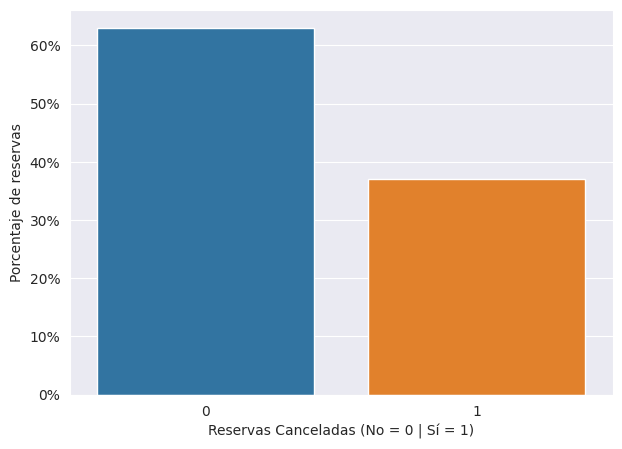

In [ ]:
plot(x, y, x_label='Reservas Canceladas (No = 0 | Sí = 1)', y_label='Porcentaje de reservas')

In [ ]:
# Valores del estado de reservación
df2.reservation_status.unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [ ]:
# Reservas No Canceladas
df_no_canceladas = df2[df2['is_canceled'] == 0]
df_no_canceladas

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0,0,0,Transient,0.00,0,0,Check-Out,2015-07-01
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240,0,0,Transient,98.00,0,1,Check-Out,2015-07-03
15,Resort Hotel,0,68,2015,July,27,1,0,4,2,...,No Deposit,240,0,0,Transient,97.00,0,3,Check-Out,2015-07-05
20,Resort Hotel,0,37,2015,July,27,1,1,4,1,...,No Deposit,241,0,0,Transient,97.29,0,1,Check-Out,2015-07-06
25,Resort Hotel,0,78,2015,July,27,1,2,5,2,...,No Deposit,5,0,0,Transient,63.60,1,0,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119365,City Hotel,0,54,2017,August,35,27,3,5,1,...,No Deposit,14,0,0,Transient,266.75,0,1,Check-Out,2017-09-04
119370,City Hotel,0,201,2017,August,35,30,1,4,1,...,No Deposit,9,0,0,Transient,108.00,0,2,Check-Out,2017-09-04
119375,City Hotel,0,200,2017,August,35,30,1,4,2,...,No Deposit,16,0,0,Transient,85.50,0,1,Check-Out,2017-09-04
119380,City Hotel,0,44,2017,August,35,31,1,3,2,...,No Deposit,9,0,0,Transient,140.75,0,1,Check-Out,2017-09-04


## Reservas por Tipo de Hotel

x:  ['City Hotel' 'Resort Hotel'] 
y:  [61.238 38.762]




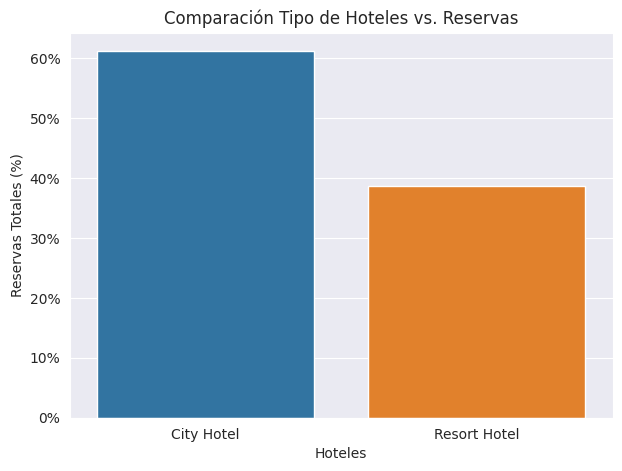

In [ ]:
x, y = get_count(df_no_canceladas['hotel'])
print('x: ', x, '\ny: ', np.round_(y, decimals=3))
print('\n')
plot(x, y, x_label='Hoteles', y_label='Reservas Totales (%)', title='Comparación Tipo de Hoteles vs. Reservas')

## Reservas por Año

In [ ]:
df2['arrival_date_year'].unique()

array([2015, 2016, 2017])

x:  [2016 2017 2015] 
y:  [48.295 33.253 18.452]




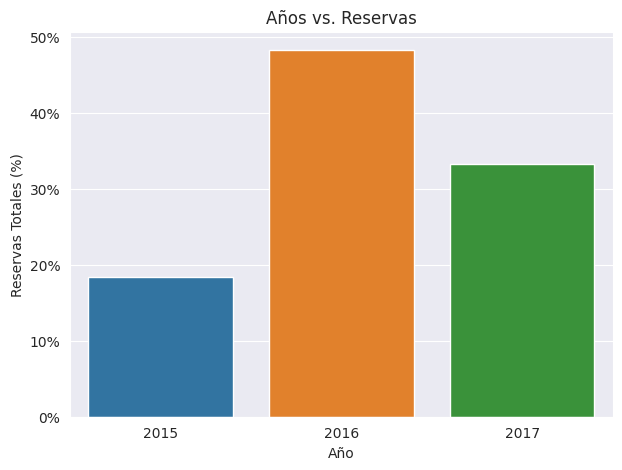

In [ ]:
# Comparación de Años y Reservas
x, y = get_count(df_no_canceladas['arrival_date_year'])
print('x: ', x, '\ny: ', np.round_(y, decimals=3))
print('\n')
plot(x, y, x_label='Año', y_label='Reservas Totales (%)', title='Años vs. Reservas')

<ipython-input-34-372387c12f82>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(), annot=True, ax=ax);


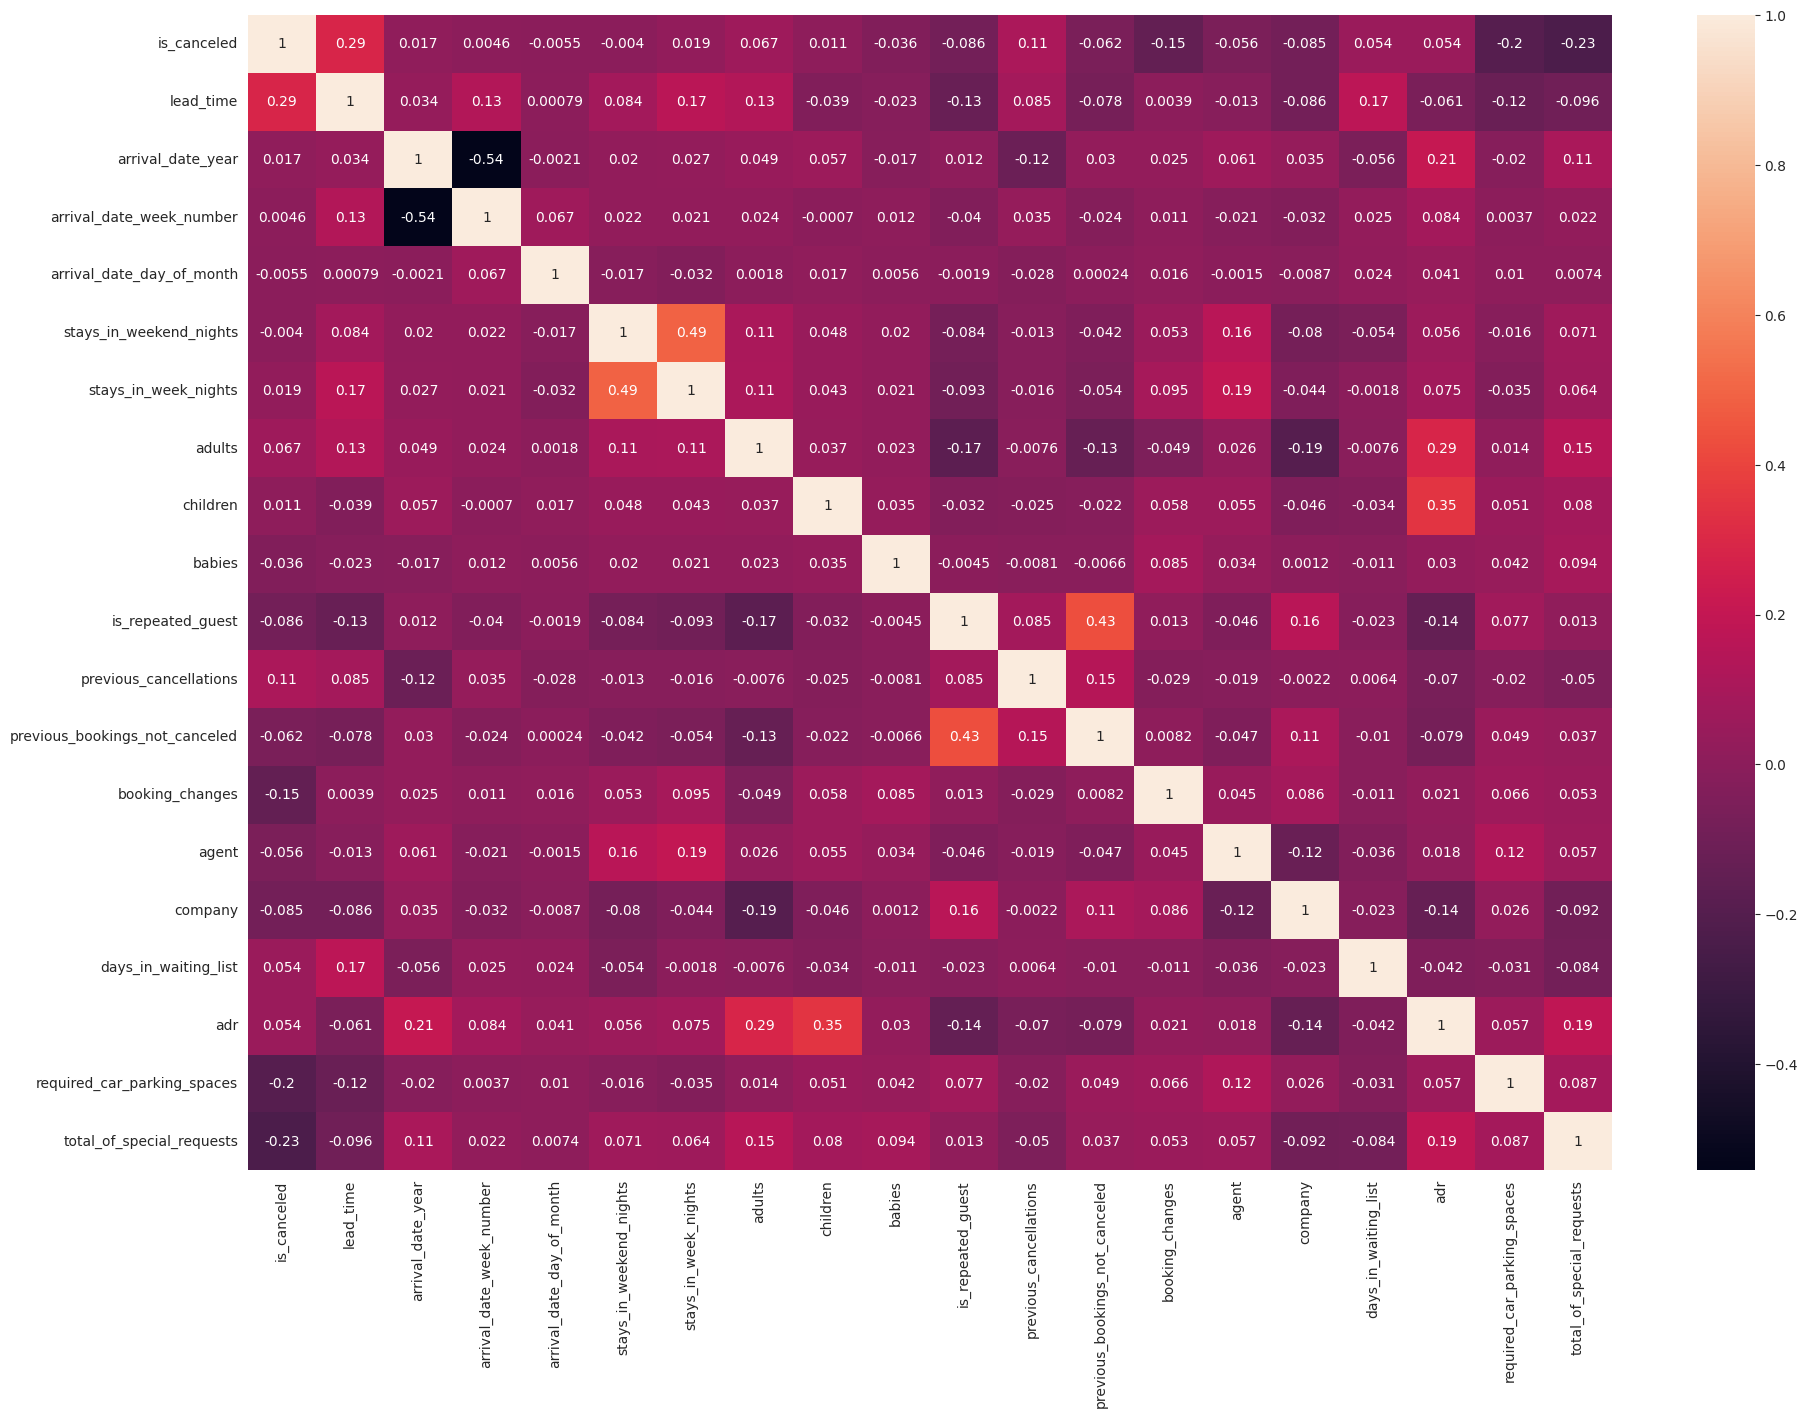

In [ ]:
fig, ax = plt.subplots(figsize=(22,15))
sns.heatmap(df2.corr(), annot=True, ax=ax);

<ipython-input-35-c4153cc3ae61>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_subset.corr(), annot=True, ax=ax);


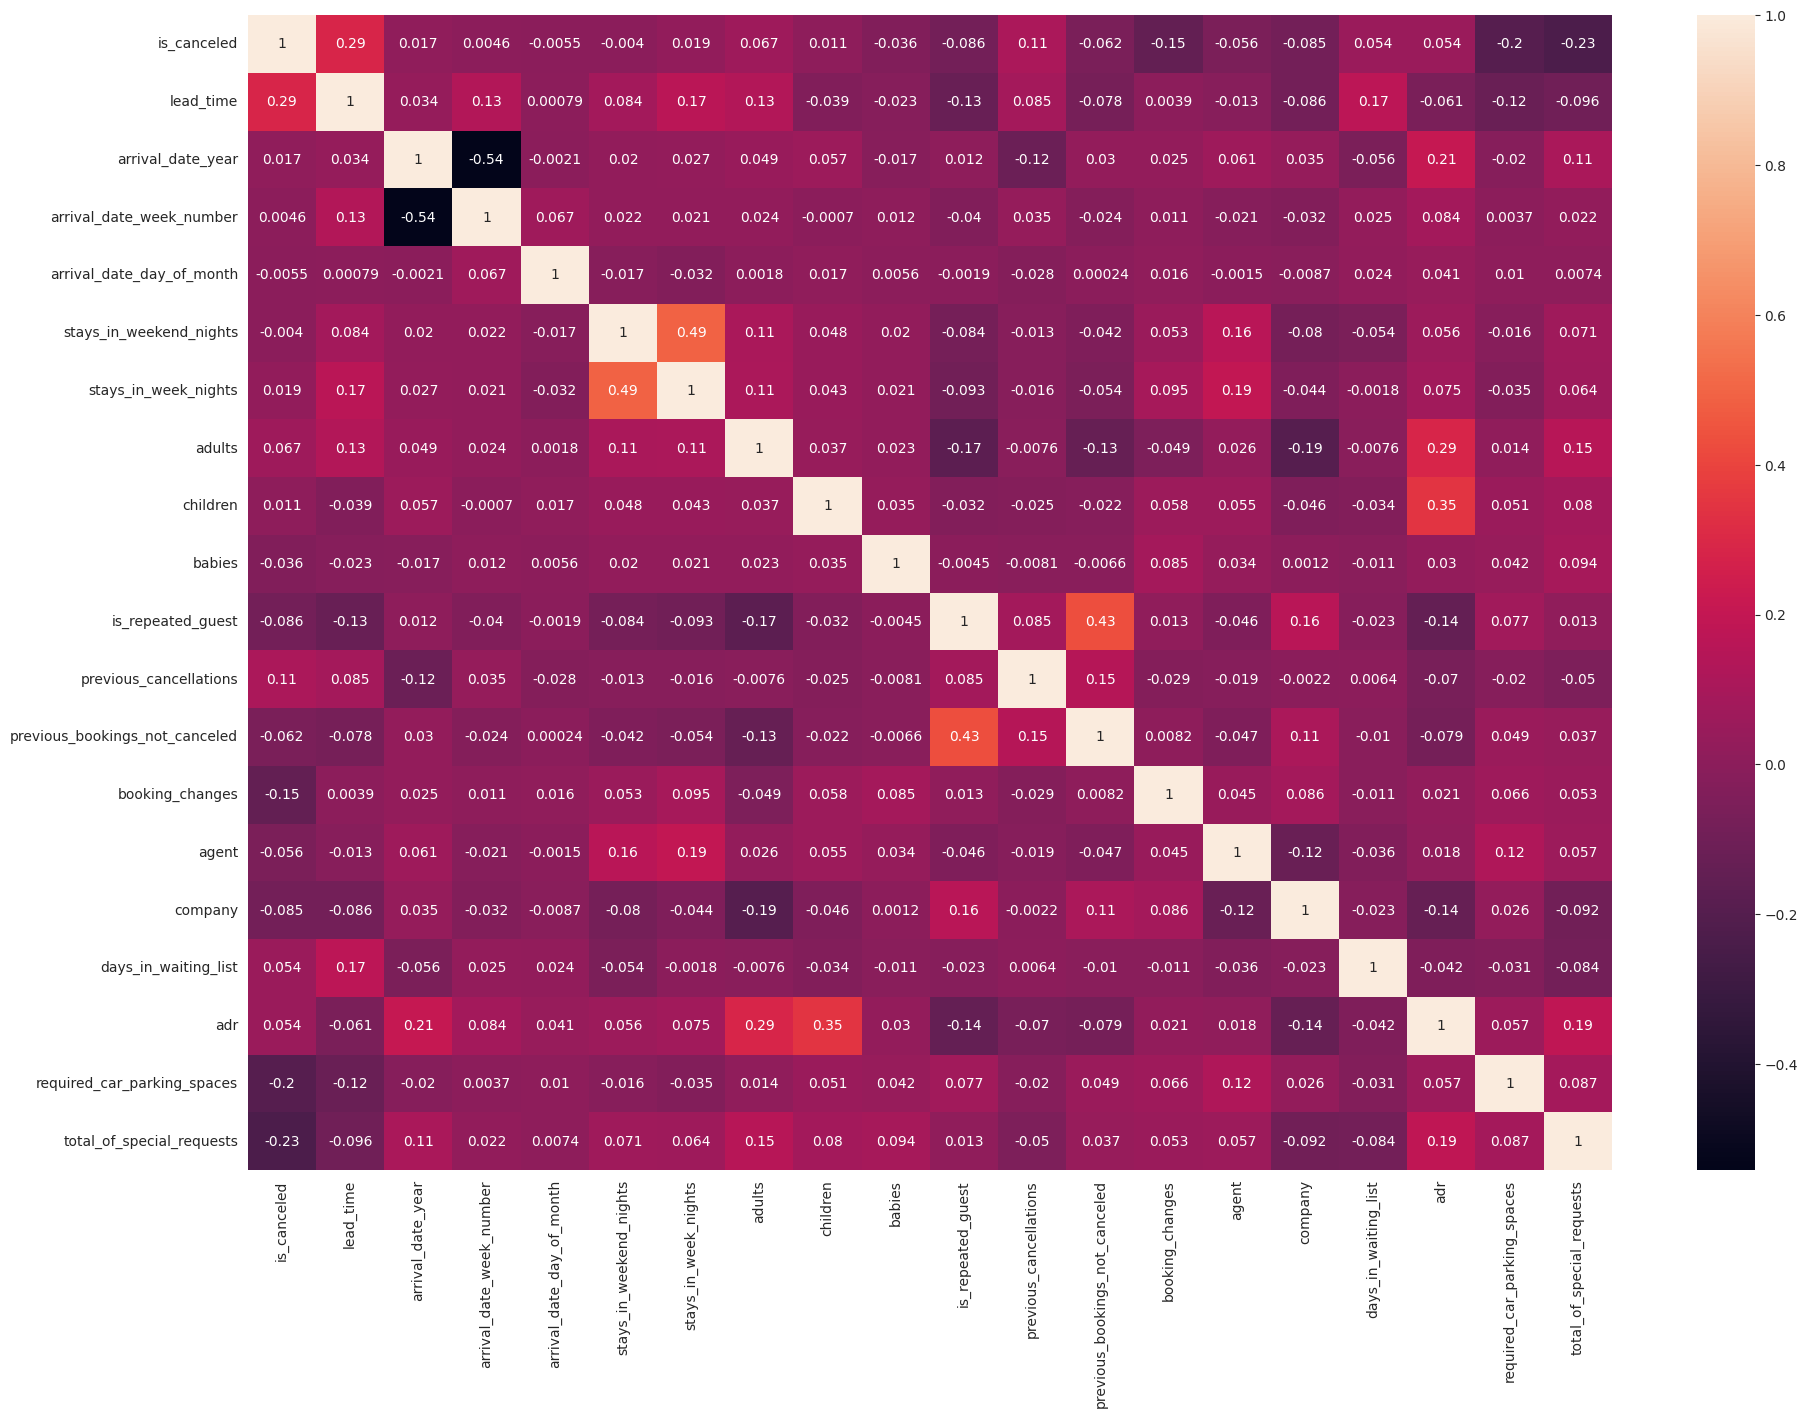

In [ ]:
df_subset = df2.copy()
df_subset.drop(['arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month',
                  'arrival_date_month','assigned_room_type','reserved_room_type',
                  'reservation_status_date', 'previous_cancellations',
                  'previous_bookings_not_canceled', 'reservation_status', 'is_canceled'], axis=1)
fig, ax = plt.subplots(figsize=(22,15))
sns.heatmap(df_subset.corr(), annot=True, ax=ax);

# Preparación de los Datos

Antes de pasar los datos por los modelos de *machine learning*, es necesario convertir sus variables categóricas a variables discretas.

In [ ]:
df2.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                            int64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [ ]:
# Listado de variables tipo categóricas de la base de datos
columnas_categoricas = df2.columns[df2.dtypes == object]
columnas_categoricas

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

In [ ]:
# Función para transformar las variables de tipo categórico a tipo discreto

def transform(dataframe):
    
    ## Import LabelEncoder from sklearn
    from sklearn.preprocessing import LabelEncoder
    
    le = LabelEncoder()
    
    ## Select all categorcial features
    categorical_features = list(dataframe.columns[dataframe.dtypes == object])
    
    ## Apply Label Encoding on all categorical features
    return dataframe[categorical_features].apply(lambda x: le.fit_transform(x))

In [ ]:
# Se hace una copia al dataframe
df3 = df2.copy()

# Se transforman las variables de tipo categórico a tipo discreto
df3 = transform(df3)
print('df3.shape:', df3.shape)
df3.info()

df3.shape: (23842, 12)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23842 entries, 0 to 119385
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   hotel                    23842 non-null  int64
 1   arrival_date_month       23842 non-null  int64
 2   meal                     23842 non-null  int64
 3   country                  23842 non-null  int64
 4   market_segment           23842 non-null  int64
 5   distribution_channel     23842 non-null  int64
 6   reserved_room_type       23842 non-null  int64
 7   assigned_room_type       23842 non-null  int64
 8   deposit_type             23842 non-null  int64
 9   customer_type            23842 non-null  int64
 10  reservation_status       23842 non-null  int64
 11  reservation_status_date  23842 non-null  int64
dtypes: int64(12)
memory usage: 2.4 MB


In [ ]:
# Se eliminan las columnas categóricas, para luego agregarle las columnas transformadas.
df2 = df2.drop(columnas_categoricas, axis=1)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23842 entries, 0 to 119385
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     23842 non-null  int64  
 1   lead_time                       23842 non-null  int64  
 2   arrival_date_year               23842 non-null  int64  
 3   arrival_date_week_number        23842 non-null  int64  
 4   arrival_date_day_of_month       23842 non-null  int64  
 5   stays_in_weekend_nights         23842 non-null  int64  
 6   stays_in_week_nights            23842 non-null  int64  
 7   adults                          23842 non-null  int64  
 8   children                        23842 non-null  int64  
 9   babies                          23842 non-null  int64  
 10  is_repeated_guest               23842 non-null  int64  
 11  previous_cancellations          23842 non-null  int64  
 12  previous_bookings_not_canceled 

In [ ]:
# Se completa el dataframe con las columnas transformadas
df2[columnas_categoricas] = df3[columnas_categoricas]
df3 = df2.copy()
df3

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,0,342,2015,27,1,0,0,2,0,0,...,0,111,3,1,2,2,0,2,1,81
5,0,14,2015,27,1,0,2,2,0,0,...,0,48,6,3,0,0,0,2,1,83
10,1,23,2015,27,1,0,4,2,0,0,...,0,111,6,3,4,4,0,2,0,74
15,0,68,2015,27,1,0,4,2,0,0,...,0,64,6,3,3,4,0,2,1,85
20,0,37,2015,27,1,1,4,1,0,0,...,0,48,6,3,5,5,0,2,1,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119365,0,54,2017,35,27,3,5,1,0,0,...,0,73,3,1,6,6,0,2,1,877
119370,0,201,2017,35,30,1,4,1,0,0,...,0,35,6,3,0,0,0,2,1,877
119375,0,200,2017,35,30,1,4,2,0,0,...,0,9,5,3,0,0,0,2,1,877
119380,0,44,2017,35,31,1,3,2,0,0,...,3,35,6,3,0,0,0,2,1,877


# Modelos

## Modelos Predictivos (Clasificación)




* Funciones Discriminantes Gaussianas (No
GMMs)
* K vecinos más cercanos
* **Feed-Forward Neural Networks**
* **Random Forest**
* Máquinas de Vectores de Soporte


In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import time
import scikitplot as skplt


X_df = df3.drop(['arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month',
                  'arrival_date_month','assigned_room_type','reserved_room_type',
                  'reservation_status_date', 'previous_cancellations',
                  'previous_bookings_not_canceled', 'reservation_status', 'is_canceled'], axis=1)

Y_df = df3['is_canceled']

# Se convierte las variables a arrays de Numpy
X = X_df.to_numpy()
Y = Y_df.to_numpy()

In [ ]:
# Estandarizamos los datos usando Max - Min
# Recuerde que para los modelos basados en distancias es indispensable estandarizar.
# ya que esto evita que unas variables opaquen a las otras.
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
X_estandarizado = scaler.fit_transform(X)

In [ ]:
def classification_error(Yestimado, Yteorico):
    '''
    Método para calcular error de clasificación en problemas biclase o multiclase
    parámetros 
    Yestimado: numpy.ndarray con las clases predichas
    Yteorico: numpy.ndarray con las clases conocidas
    return
    sens, esp, acc, prec, f1 (sensibilidad, especificidad, eficiencia, precisión y f1 score)
    '''
    err = 0
    for y_e, y_r in zip(Yestimado, Yteorico):
        if y_e != y_r:
            err += 1

    error = err/np.size(Yestimado)
    
    return error


def metrics(y_test, y_pred, is_binary):
    '''
    Parametros:
      - lista (array) y_test (One-hot encoding)
      - lista (array) y_predichas (softmax vector)
    Return: 
      - F1
      - Recall
      - Precision
      - Accuracy
      - Especificity
    '''
    y_test = np.asarray(y_test)
    y_pred = np.asarray(y_pred)

    # if y_test[0].shape[0] == 1:    #Biclase
    if is_binary:
        TP, TN, FP, FN = 0, 0, 0, 0
        for test_value, predicted_value in zip(y_test, y_pred):
          if test_value==1:
            if predicted_value>=0.5:
              TP+=1
            else:
              FN+=1
          else:
            if predicted_value>=0.5: 
              FP+=1
            else:
              TN+=1
        
        recall = TP/(TP+FN)
        prec = TP/(TP+FP)
        acc = (TP+TN)/(TP+FP+FN+TN)
        f1 = (2*recall*prec)/(recall+prec)
        esp = TN/(TN+FP)

        return f1, recall, prec, acc, esp
    
    else:    #Multiclase
        error = 0
        for test,pred in zip(y_test,y_pred):
            t = np.argmax(test)
            p = np.argmax(pred)
            if t!=p:
              error+=1
              
        err = error/np.shape(y_test)[0]     
        acc = 1 - err

        return acc

### Random Forest

[[1737  645]
 [   2    0]]
              precision    recall  f1-score   support

           0       1.00      0.73      0.84      2382
           1       0.00      0.00      0.00         2

    accuracy                           0.73      2384
   macro avg       0.50      0.36      0.42      2384
weighted avg       1.00      0.73      0.84      2384


Resultado de clasificación con  10 árboles:

Error en la clasificación:  0.271  +/-  0.138

Tiempo total de ejecución:  2.3  segundos.
0.0
0.0
0.0
0.7286073825503355
accuracy: 0.729


[[1686  696]
 [   2    0]]
              precision    recall  f1-score   support

           0       1.00      0.71      0.83      2382
           1       0.00      0.00      0.00         2

    accuracy                           0.71      2384
   macro avg       0.50      0.35      0.41      2384
weighted avg       1.00      0.71      0.83      2384


Resultado de clasificación con  20 árboles:

Error en la clasificación:  0.274  +/-  0.13

Tiempo total de

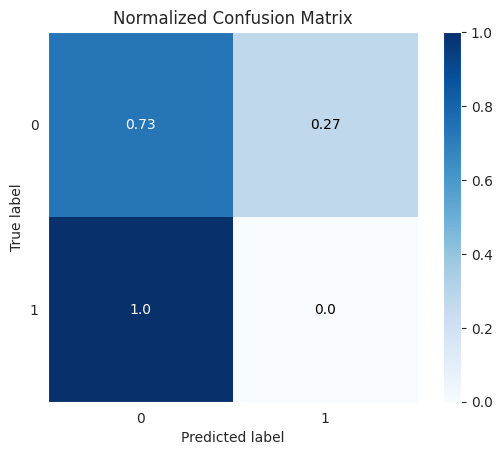

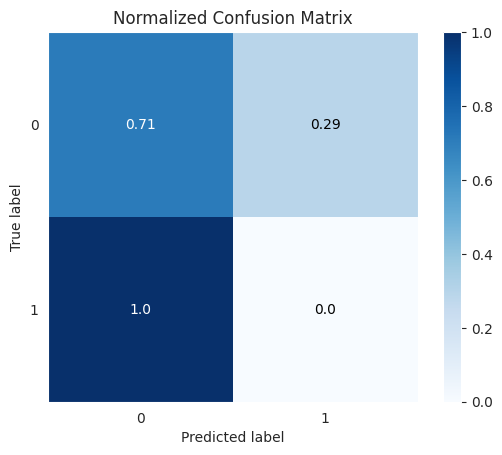

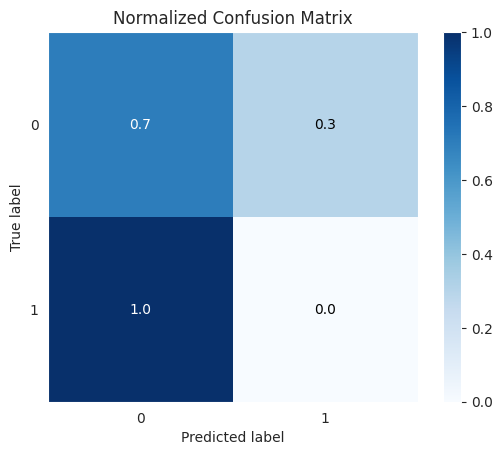

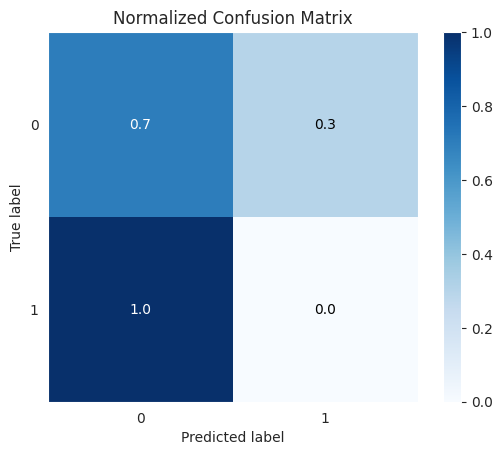

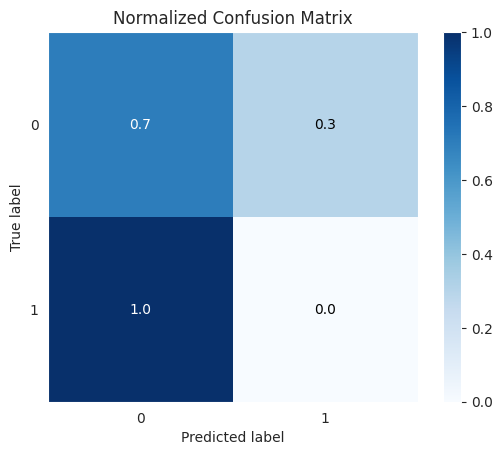

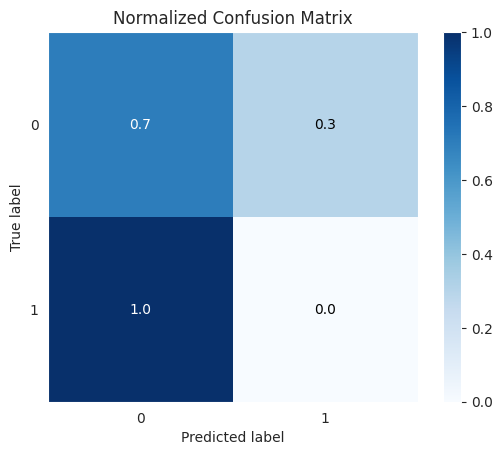

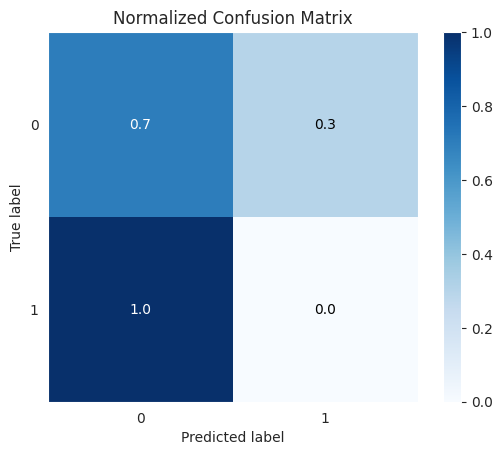

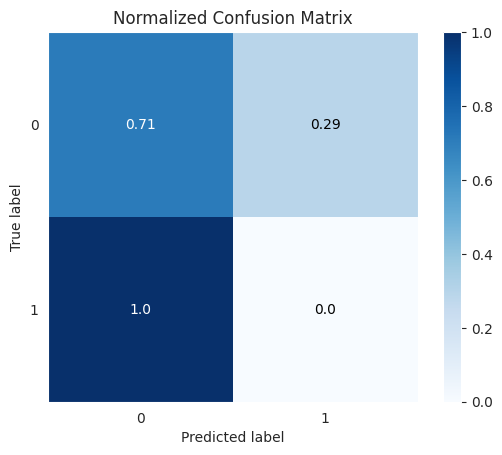

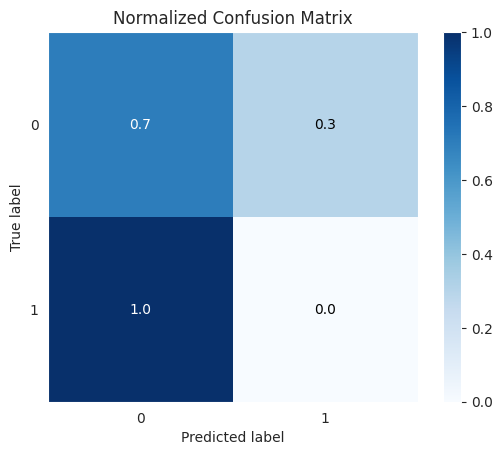

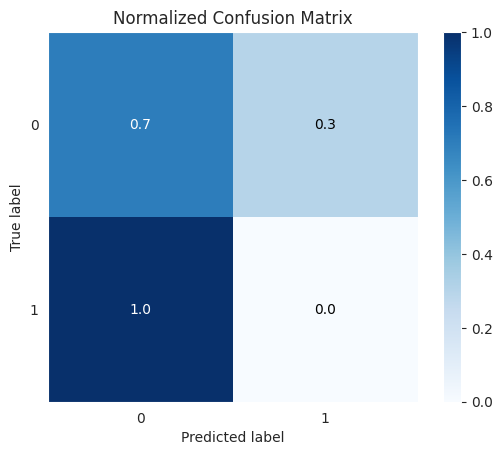

In [ ]:
## Random Forest ##

from sklearn.ensemble import RandomForestClassifier

numero_splits = 10
kf = KFold(n_splits = numero_splits)

for B in range(10, 101, 10):
    # B = 100    
    tiempo_i = time.time()

    errores = np.zeros(numero_splits)
    j = 0

    X_estandarizado = X


    #Aplicando la metodología de validación
    for train_index, test_index in kf.split(X_estandarizado):
        
        # Muestras de entrenamiento y validación
        Xtrain, Xtest = X_estandarizado[train_index], X_estandarizado[test_index]
        Ytrain, Ytest = Y[train_index], Y[test_index]


        # Modelo Random Forest 
        randForest = RandomForestClassifier(n_estimators = B).fit(Xtrain, Ytrain)


        #Complete el código aquí prediciendo la clase para las muestras de validación de la base de datos
        Ypred = randForest.predict(Xtest)

        errores[j] = classification_error(Ypred, Ytest)
        # errores[j] = accuracy_score(Ypred, Ytest)
        j += 1

        
    duracion = time.time() - tiempo_i
    # error_medio = np.round_(np.mean(Accuracy), decimals=3)
    # error_std = np.round_(np.std(Accuracy), decimals=3)
    # print('\nResultado de clasificación con ', B, 'árboles:')
    # print ("accuracy: ", str(1-np.mean(Errores)), '+/-', np.std(np.asarray(acc)))

    error_medio = np.round_(np.mean(errores), decimals=3)
    error_std = np.round_(np.std(errores), decimals=3)

    # Matriz de confusión
    skplt.metrics.plot_confusion_matrix(Ytest, Ypred, normalize=True) 
    print(confusion_matrix(Ytest, Ypred))
    print(classification_report(Ytest, Ypred))
    print('\nResultado de clasificación con ', B, 'árboles:')
    print("\nError en la clasificación: ", error_medio, " +/- ", error_std)
    print("\nTiempo total de ejecución: ", np.round_(duracion, decimals=1), " segundos.")
    print(precision_score(Ytest, Ypred))
    print(recall_score(Ytest, Ypred))
    print(f1_score(Ytest, Ypred))
    print(accuracy_score(Ytest, Ypred))
    accuracy_1 = 1 - error_medio
    print('accuracy:', accuracy_1)
    # print('f1, recall, prec, acc, esp:', metrics(Ytest, Ypred, is_binary=True))

    # print(y_test[0].shape[0])
    print('\n============================\n')



### Red Neuronal

In [ ]:
from sklearn.preprocessing import OneHotEncoder

def oneHotEncoder(y):
    
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = y.reshape(len(y), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    return onehot_encoded

Y_OneHotEncoded = oneHotEncoder(Y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


75/75 [==============================] - 0s 1ms/step
[[1275  197]
 [ 292  620]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1472
           1       0.76      0.68      0.72       912

    accuracy                           0.79      2384
   macro avg       0.79      0.77      0.78      2384
weighted avg       0.79      0.79      0.79      2384


Epocas:  10 	Neuronas Capa Oculta:  10

Error en la clasificación:  0.217  +/-  0.016

Tiempo total de ejecución:  56.8  segundos.


75/75 [==============================] - 0s 1ms/step
[[1444   78]
 [ 388  474]]
              precision    recall  f1-score   support

           0       0.79      0.95      0.86      1522
           1       0.86      0.55      0.67       862

    accuracy                           0.80      2384
   macro avg       0.82      0.75      0.77      2384
weighted avg       0.81      0.80      0.79      2384


Epocas:  10 	Neuronas Capa Oculta:  20

Error en la

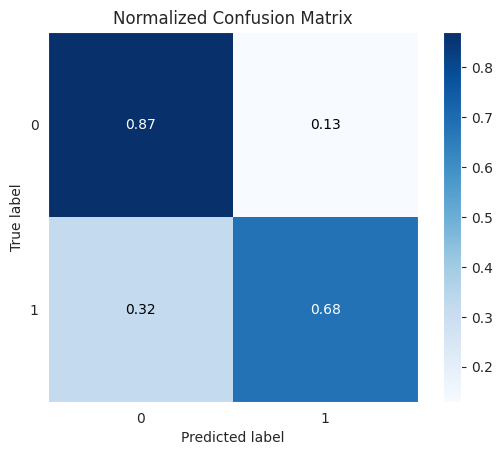

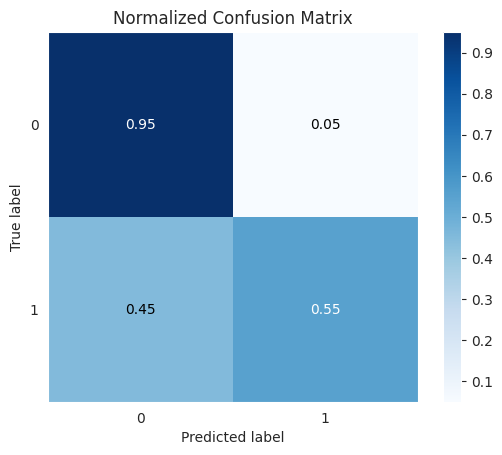

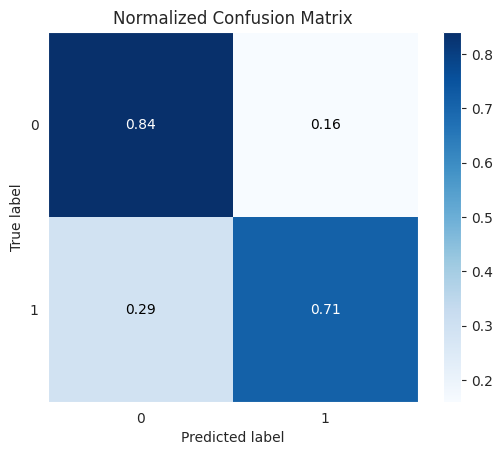

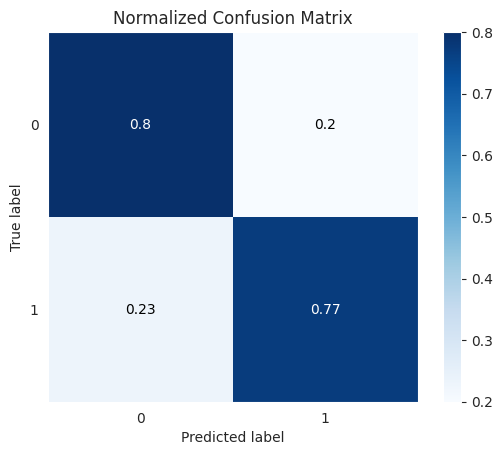

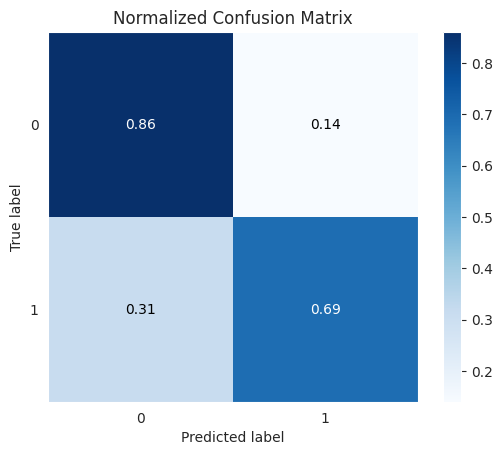

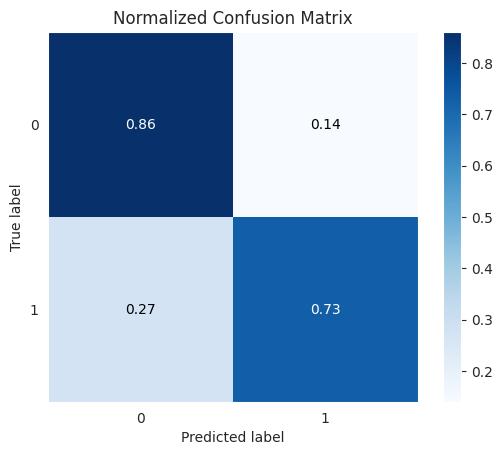

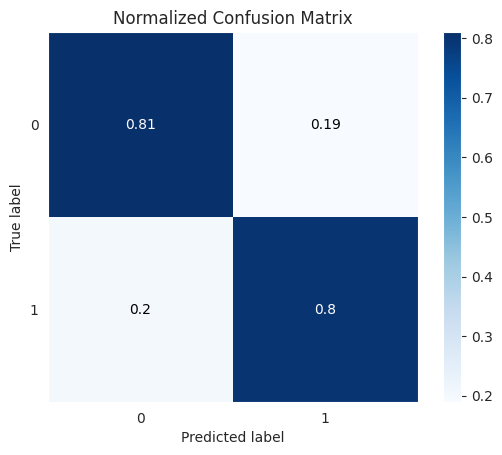

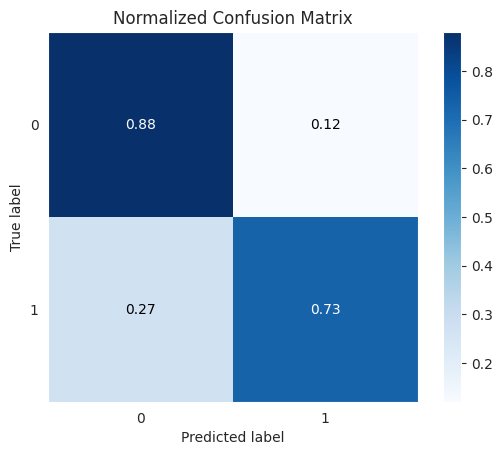

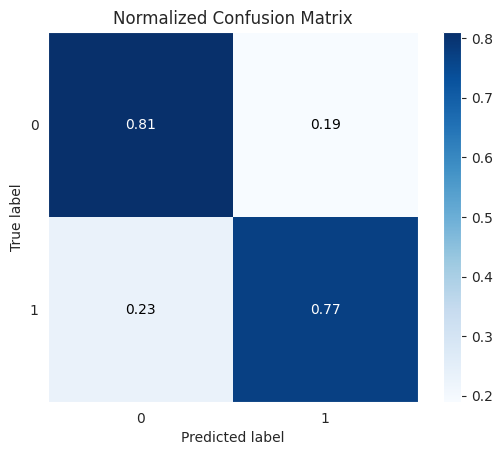

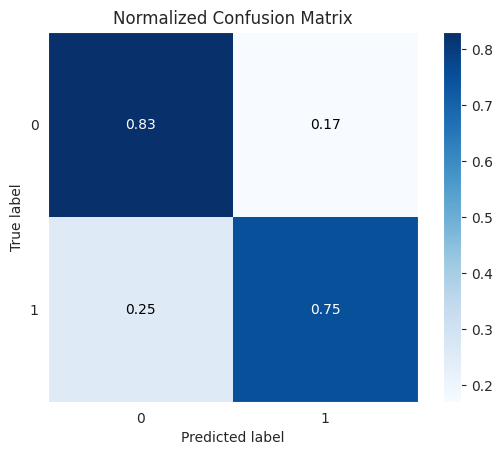

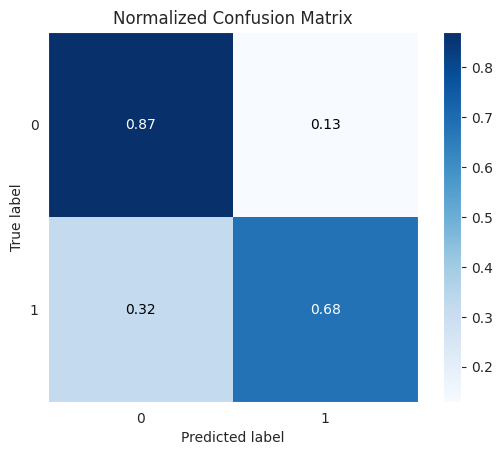

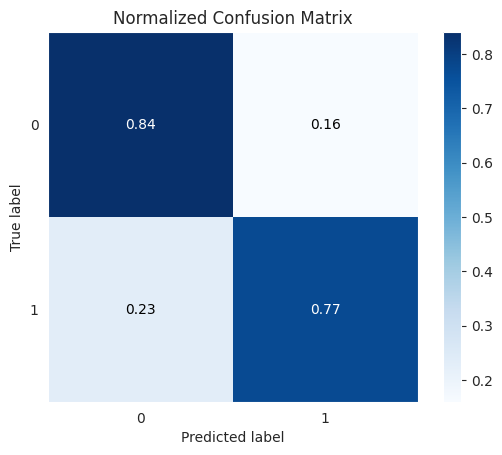

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.metrics import accuracy


numero_caracteristicas = X.shape[1]

listado_epocas = [10, 30, 50]
numero_neuronas = [10, 20, 30, 50]

# listado_epocas = [30]
# numero_neuronas = [50]

for epocas in listado_epocas:
    for neuronas in numero_neuronas:
        tiempo_i = time.time()
        model = Sequential()
        model.add(Dense(neuronas, input_dim = numero_caracteristicas, activation="relu"))
        # model.add(Dense(2, activation="relu"))
        model.add(Dense(2, activation="softmax"))

        numero_splits = 10
        errores = np.ones(numero_splits)
        # Accuracy = np.zeros(10)
        
        #Implemetamos la metodología de validación cross-validation con 10 folds
        kf = KFold(n_splits=10, shuffle=True)
        j = 0

        for train_index, test_index in kf.split(X):
            Xtrain, Xtest = X[train_index], X[test_index]
            Ytrain, Ytest = Y_OneHotEncoded[train_index], Y_OneHotEncoded[test_index]  

            
            #Se usa el optimizador Adam
            model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'] )
            # model.compile(optimizer="adam", loss="mse")

            #Entrenamiento del modelo
            model.fit(Xtrain,  Ytrain, epochs=epocas, batch_size=100, validation_split=0.1, verbose=0)

            #Validación del modelo
            Ypred = model.predict(Xtest)

            Ypred = np.argmax(Ypred, axis=1)
            Ytest = np.argmax(Ytest, axis=1)

            # print('Ypred shape', Ypred.shape)
            # print('Ypred', Ypred)
            errores[j] = classification_error(Ytest, Ypred)
            # Accuracy[j] = metrics(Ytest, Ypred)

            # Ypred = np.argmax(Ypred, axis=1)
            # Ytest = np.argmax(Ytest, axis=1)
            
            j+=1


        duracion = time.time() - tiempo_i
        # error_medio = np.round_(np.mean(Accuracy), decimals=3)
        # error_std = np.round_(np.std(Accuracy), decimals=3)

        error_medio = np.round_(np.mean(errores), decimals=3)
        error_std = np.round_(np.std(errores), decimals=3)

        # Matriz de confusión
        skplt.metrics.plot_confusion_matrix(Ytest, Ypred, normalize=True) 
        print(confusion_matrix(Ytest, Ypred))
        print(classification_report(Ytest, Ypred))
        print('\nEpocas: ', epocas, '\tNeuronas Capa Oculta: ', neuronas)
        print("\nError en la clasificación: ", error_medio, " +/- ", error_std)
        print ("\nTiempo total de ejecución: ", np.round_(duracion, decimals=1), " segundos.")
        print('\n============================\n')


## Modelos No Supervisados


* **KMeans**
* **Agglomerative Clustering**

In [ ]:
# from local.lib import mlutils
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.neighbors import kneighbors_graph

%matplotlib inline

In [ ]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23842 entries, 0 to 119385
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   lead_time                    23842 non-null  int64  
 1   stays_in_weekend_nights      23842 non-null  int64  
 2   stays_in_week_nights         23842 non-null  int64  
 3   adults                       23842 non-null  int64  
 4   children                     23842 non-null  int64  
 5   babies                       23842 non-null  int64  
 6   is_repeated_guest            23842 non-null  int64  
 7   booking_changes              23842 non-null  int64  
 8   agent                        23842 non-null  int64  
 9   company                      23842 non-null  int64  
 10  days_in_waiting_list         23842 non-null  int64  
 11  adr                          23842 non-null  float64
 12  required_car_parking_spaces  23842 non-null  int64  
 13  total_of_specia

#### Combinación
Hotel y País

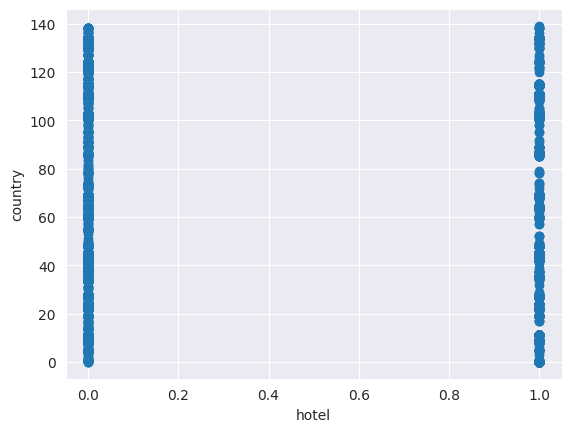

In [ ]:
# Variables: 'hotel' y 'country'
plt.scatter(X_estandarizado[:, 14], X_estandarizado[:, 16])
plt.xlabel("hotel")
plt.ylabel("country");

### K-means

In [ ]:
n_clusters = 2

km = KMeans(n_clusters=n_clusters)
km.fit(X_estandarizado)
y = km.predict(X_estandarizado)
y.shape

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(23842,)

In [ ]:
pd.Series(Y).value_counts()

0    15012
1     8830
dtype: int64

In [ ]:
km.cluster_centers_

array([[1.05086064e+02, 8.38165494e-01, 2.29656316e+00, 1.84994567e+00,
        8.70360839e-02, 5.43260708e-03, 3.64842454e-02, 2.03694173e-01,
        1.40851490e+01, 1.41783611e+01, 2.87436381e+00, 1.01171971e+02,
        4.15737405e-02, 5.34568537e-01, 1.46851947e-01, 5.74197976e-01,
        7.55226740e+01, 4.83130325e+00, 2.54772116e+00, 1.47252245e-01,
        2.13444273e+00],
       [1.01059166e+02, 1.17671125e+00, 3.05790716e+00, 1.88418568e+00,
        1.43194335e-01, 1.27458694e-02, 1.99842644e-02, 2.65774980e-01,
        2.43598584e+02, 1.64421715e+00, 7.49645948e-01, 1.04333736e+02,
        1.18017309e-01, 6.84343037e-01, 8.56333596e-01, 4.85759245e-01,
        7.63197482e+01, 5.20786782e+00, 2.70007868e+00, 6.53029111e-02,
        2.14523997e+00]])

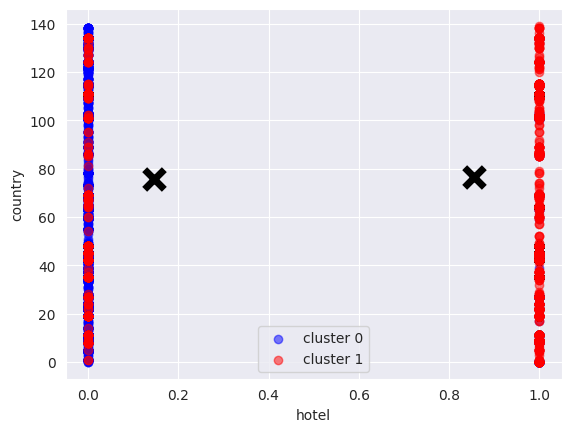

In [ ]:
def plot_clusters(X_estandarizado, y):
    n_clusters = len(np.unique(y))
    cmap = plt.cm.bwr if n_clusters==2 else plt.cm.plasma
    cmap((y*255./(n_clusters-1)).astype(int))
    for i in np.unique(y):
        col = cmap((i*255./(n_clusters-1)).astype(int))
        Xr = X_estandarizado[y==i]
        plt.scatter(Xr[:, 14], Xr[:, 16], color=col, label="cluster %d"%i, alpha=.5)
    plt.scatter(km.cluster_centers_[:, 14], km.cluster_centers_[:, 16], marker="x", lw=5, s=200, color="black")
    plt.legend()    
    plt.xlabel("hotel")
    plt.ylabel("country");



plot_clusters(X,y)

### Agglomerative Clustering

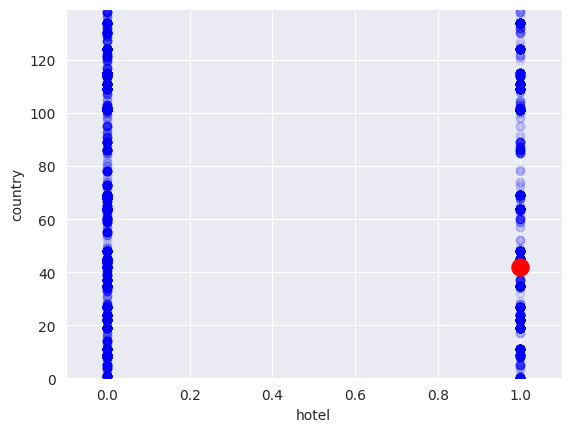

In [ ]:
i = np.random.randint(len(X_estandarizado))
knn_graph = kneighbors_graph(X_estandarizado, 50, include_self=False)

nn = X_estandarizado[knn_graph[i].toarray()[0].astype(bool)]
plt.scatter(nn[:,0], nn[:,1], color="blue", alpha=1)
plt.scatter(X_estandarizado[:, 14], X_estandarizado[:, 16], color="blue", alpha=.1)
plt.scatter(X_estandarizado[i, 14], X_estandarizado[i, 16], s=150, color="red")
plt.xlim(np.min(X_estandarizado[:, 14])-.1, np.max(X_estandarizado[:, 14])+.1)
plt.ylim(np.min(X_estandarizado[:, 16])-.1, np.max(X_estandarizado[:, 16])+.1)
plt.xlabel("hotel")
plt.ylabel("country");

In [ ]:
knn_graph = kneighbors_graph(X_estandarizado, 20, include_self=False)

estrategias = ['complete', 'average']
for estrategia in estrategias:
    clustering = AgglomerativeClustering(connectivity=knn_graph, linkage = estrategia).fit(X)   
    clustering
    X_groups = clustering.labels_
